In [171]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

from clean_variables import *
from select_variables import *

import csv 
import pandas as pd
import random
import matplotlib.pyplot as plt

seed = 7
numpy.random.seed(seed)

In [140]:
stars = pd.read_csv("assignment_ds.csv")

In [141]:
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3453,0.000621,0.07730,17.08,Red,M,0
1,12098,689.000000,7.01000,0.02,Blue-white,A,3
2,2731,0.000437,0.08560,18.09,Red,M,0
3,37800,202900.000000,6.86000,-4.56,Blue,O,3
4,8570,0.000810,0.00970,14.20,Blue white,A,2
...,...,...,...,...,...,...,...
195,13420,0.000590,0.00981,13.67,Blue White,B,2
196,19860,0.001100,0.01310,11.34,Blue,B,2
197,13023,998.000000,6.21000,-1.38,Blue-white,A,3
198,39000,204000.000000,10.60000,-4.70,Blue,O,3


In [142]:
print(clean_colors(stars))
print(clean_spectral_classes(stars))

{'blue-white', 'blue', 'orange', 'pale yellow orange', 'whitish', 'orange-red', 'yellowish white', 'white-yellow', 'white', 'red', 'yellowish', 'blue white', 'yellow-white'}
{'K', 'B', 'A', 'G', 'O', 'M', 'F'}


In [143]:
colors = ['whitish','red','pale yellow orange','white-yellow','blue','yellow-white','yellowish','yellowish white','orange-red','orange','white','blue white','blue-white']
spectral_classes = ['O', 'F', 'G', 'K', 'A', 'M', 'B']

In [144]:
types = stars.iloc[:,-1]

stars_inputs = get_inputs(stars,colors, spectral_classes)

In [145]:
index_list = rand_index(stars.shape[0])
x_train, y_train, x_test, y_test = select_variables(stars_inputs,types,index_list, 160)

In [146]:
model = Sequential()
model.add(Dense(10, input_dim=24, activation='selu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


#model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',activation='relu'))
#model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [147]:
#target_training
y = []
ls = []
y=IntegerEncode2(y_train)
target_test=IntegerEncode2(y_test)

In [148]:
num_epochs=1482

history = model.fit(x_train, y,validation_data=(x_test, target_test), epochs=num_epochs,batch_size=64,verbose=1)
#alvarito
#history = model.fit(x_train, y, epochs=num_epochs )

Epoch 1/1482
3/3 [==============================] - 1s 113ms/step - loss: 54676.5430 - accuracy: 0.1625 - val_loss: 64322.8516 - val_accuracy: 0.1250
Epoch 2/1482
3/3 [==============================] - 0s 20ms/step - loss: 52676.7930 - accuracy: 0.1625 - val_loss: 62182.8008 - val_accuracy: 0.1250
Epoch 3/1482
3/3 [==============================] - 0s 27ms/step - loss: 50967.3359 - accuracy: 0.1625 - val_loss: 60424.7383 - val_accuracy: 0.1250
Epoch 4/1482
3/3 [==============================] - 0s 23ms/step - loss: 49472.1953 - accuracy: 0.1625 - val_loss: 58626.4180 - val_accuracy: 0.1250
Epoch 5/1482
3/3 [==============================] - 0s 29ms/step - loss: 47940.8828 - accuracy: 0.1625 - val_loss: 56813.6484 - val_accuracy: 0.1250
Epoch 6/1482
3/3 [==============================] - 0s 22ms/step - loss: 46378.8125 - accuracy: 0.1625 - val_loss: 55002.8359 - val_accuracy: 0.1250
Epoch 7/1482
3/3 [==============================] - 0s 28ms/step - loss: 44957.2188 - accuracy: 0.1625 - 

Epoch 111/1482
3/3 [==============================] - 0s 28ms/step - loss: 56.4860 - accuracy: 0.5625 - val_loss: 73.7023 - val_accuracy: 0.4250
Epoch 112/1482
3/3 [==============================] - 0s 30ms/step - loss: 53.9514 - accuracy: 0.5500 - val_loss: 70.4220 - val_accuracy: 0.5250
Epoch 113/1482
3/3 [==============================] - 0s 21ms/step - loss: 44.0775 - accuracy: 0.6250 - val_loss: 92.2953 - val_accuracy: 0.4750
Epoch 114/1482
3/3 [==============================] - 0s 21ms/step - loss: 47.8498 - accuracy: 0.6187 - val_loss: 93.9919 - val_accuracy: 0.4250
Epoch 115/1482
3/3 [==============================] - 0s 22ms/step - loss: 37.2928 - accuracy: 0.6250 - val_loss: 63.0341 - val_accuracy: 0.5750
Epoch 116/1482
3/3 [==============================] - 0s 25ms/step - loss: 30.7041 - accuracy: 0.7312 - val_loss: 61.0380 - val_accuracy: 0.5500
Epoch 117/1482
3/3 [==============================] - 0s 26ms/step - loss: 24.6871 - accuracy: 0.8000 - val_loss: 62.8506 - val_ac

3/3 [==============================] - 0s 48ms/step - loss: 2.1668 - accuracy: 0.9688 - val_loss: 2.0937 - val_accuracy: 0.9500
Epoch 225/1482
3/3 [==============================] - 0s 53ms/step - loss: 2.3855 - accuracy: 0.9375 - val_loss: 1.8172 - val_accuracy: 0.7750
Epoch 226/1482
3/3 [==============================] - 0s 35ms/step - loss: 2.8308 - accuracy: 0.9125 - val_loss: 0.5358 - val_accuracy: 0.6500
Epoch 227/1482
3/3 [==============================] - 0s 36ms/step - loss: 2.3848 - accuracy: 0.8375 - val_loss: 0.7966 - val_accuracy: 0.5500
Epoch 228/1482
3/3 [==============================] - 0s 25ms/step - loss: 2.2974 - accuracy: 0.8375 - val_loss: 2.5003 - val_accuracy: 0.9250
Epoch 229/1482
3/3 [==============================] - 0s 41ms/step - loss: 2.5780 - accuracy: 0.9000 - val_loss: 4.3032 - val_accuracy: 0.7250
Epoch 230/1482
3/3 [==============================] - 0s 28ms/step - loss: 2.2768 - accuracy: 0.9062 - val_loss: 2.8822 - val_accuracy: 0.6250
Epoch 231/1482

3/3 [==============================] - 0s 22ms/step - loss: 4.1650 - accuracy: 0.7750 - val_loss: 2.5103 - val_accuracy: 0.6000
Epoch 339/1482
3/3 [==============================] - 0s 20ms/step - loss: 3.4990 - accuracy: 0.7937 - val_loss: 1.2040 - val_accuracy: 0.5750
Epoch 340/1482
3/3 [==============================] - 0s 33ms/step - loss: 3.1912 - accuracy: 0.8000 - val_loss: 0.4575 - val_accuracy: 0.6250
Epoch 341/1482
3/3 [==============================] - 0s 24ms/step - loss: 3.3895 - accuracy: 0.8500 - val_loss: 6.4244 - val_accuracy: 0.6000
Epoch 342/1482
3/3 [==============================] - 0s 26ms/step - loss: 2.7671 - accuracy: 0.7875 - val_loss: 4.4668 - val_accuracy: 0.5250
Epoch 343/1482
3/3 [==============================] - 0s 31ms/step - loss: 2.4098 - accuracy: 0.8438 - val_loss: 2.6378 - val_accuracy: 0.6250
Epoch 344/1482
3/3 [==============================] - 0s 35ms/step - loss: 2.7950 - accuracy: 0.7563 - val_loss: 4.0475 - val_accuracy: 0.5250
Epoch 345/1482

3/3 [==============================] - 0s 26ms/step - loss: 16.6954 - accuracy: 0.7500 - val_loss: 50.1845 - val_accuracy: 0.6250
Epoch 453/1482
3/3 [==============================] - 0s 25ms/step - loss: 18.5105 - accuracy: 0.7937 - val_loss: 6.8202 - val_accuracy: 0.7500
Epoch 454/1482
3/3 [==============================] - 0s 23ms/step - loss: 6.4333 - accuracy: 0.8000 - val_loss: 0.4328 - val_accuracy: 0.7250
Epoch 455/1482
3/3 [==============================] - 0s 31ms/step - loss: 4.4392 - accuracy: 0.8188 - val_loss: 9.3094 - val_accuracy: 0.5250
Epoch 456/1482
3/3 [==============================] - 0s 21ms/step - loss: 4.5014 - accuracy: 0.8188 - val_loss: 2.3521 - val_accuracy: 0.8750
Epoch 457/1482
3/3 [==============================] - 0s 26ms/step - loss: 2.7750 - accuracy: 0.7875 - val_loss: 5.6940 - val_accuracy: 0.5250
Epoch 458/1482
3/3 [==============================] - 0s 20ms/step - loss: 4.3414 - accuracy: 0.8125 - val_loss: 18.2744 - val_accuracy: 0.5750
Epoch 459/

Epoch 509/1482
3/3 [==============================] - 0s 23ms/step - loss: 5.6025 - accuracy: 0.7563 - val_loss: 6.6251 - val_accuracy: 0.5500
Epoch 510/1482
3/3 [==============================] - 0s 28ms/step - loss: 26.5632 - accuracy: 0.7312 - val_loss: 6.8369 - val_accuracy: 0.5500
Epoch 511/1482
3/3 [==============================] - 0s 30ms/step - loss: 12.4179 - accuracy: 0.6750 - val_loss: 10.3964 - val_accuracy: 0.9250
Epoch 512/1482
3/3 [==============================] - 0s 30ms/step - loss: 11.4662 - accuracy: 0.8438 - val_loss: 79.1698 - val_accuracy: 0.8000
Epoch 513/1482
3/3 [==============================] - 0s 48ms/step - loss: 22.7672 - accuracy: 0.8188 - val_loss: 0.7936 - val_accuracy: 0.6500
Epoch 514/1482
3/3 [==============================] - 0s 25ms/step - loss: 53.9576 - accuracy: 0.7375 - val_loss: 1.8227 - val_accuracy: 0.5750
Epoch 515/1482
3/3 [==============================] - 0s 31ms/step - loss: 24.0440 - accuracy: 0.7000 - val_loss: 110.4374 - val_accura

Epoch 566/1482
3/3 [==============================] - 0s 21ms/step - loss: 2.3134 - accuracy: 0.9812 - val_loss: 2.7237 - val_accuracy: 0.9750
Epoch 567/1482
3/3 [==============================] - 0s 26ms/step - loss: 2.1608 - accuracy: 0.9875 - val_loss: 1.6562 - val_accuracy: 0.9750
Epoch 568/1482
3/3 [==============================] - 0s 26ms/step - loss: 2.3210 - accuracy: 0.9750 - val_loss: 5.2352 - val_accuracy: 0.8250
Epoch 569/1482
3/3 [==============================] - 0s 25ms/step - loss: 3.1789 - accuracy: 0.9563 - val_loss: 0.2259 - val_accuracy: 0.8750
Epoch 570/1482
3/3 [==============================] - 0s 21ms/step - loss: 3.2677 - accuracy: 0.9312 - val_loss: 0.2224 - val_accuracy: 0.9000
Epoch 571/1482
3/3 [==============================] - 0s 25ms/step - loss: 2.4804 - accuracy: 0.9563 - val_loss: 3.5980 - val_accuracy: 0.9750
Epoch 572/1482
3/3 [==============================] - 0s 21ms/step - loss: 2.2482 - accuracy: 0.9563 - val_loss: 8.4820 - val_accuracy: 0.9250

3/3 [==============================] - 0s 24ms/step - loss: 2.0822 - accuracy: 0.9750 - val_loss: 3.2979 - val_accuracy: 0.9500
Epoch 681/1482
3/3 [==============================] - 0s 29ms/step - loss: 2.1509 - accuracy: 0.9688 - val_loss: 6.1313 - val_accuracy: 0.8000
Epoch 682/1482
3/3 [==============================] - 0s 30ms/step - loss: 2.3107 - accuracy: 0.9625 - val_loss: 5.7440 - val_accuracy: 0.9000
Epoch 683/1482
3/3 [==============================] - 0s 31ms/step - loss: 2.5985 - accuracy: 0.9750 - val_loss: 1.6517 - val_accuracy: 0.9750
Epoch 684/1482
3/3 [==============================] - 0s 29ms/step - loss: 4.8786 - accuracy: 0.8813 - val_loss: 0.4078 - val_accuracy: 0.7500
Epoch 685/1482
3/3 [==============================] - 0s 29ms/step - loss: 3.8088 - accuracy: 0.8438 - val_loss: 1.8680 - val_accuracy: 0.5750
Epoch 686/1482
3/3 [==============================] - 0s 30ms/step - loss: 3.7727 - accuracy: 0.8250 - val_loss: 5.7934 - val_accuracy: 0.8750
Epoch 687/1482

Epoch 794/1482
3/3 [==============================] - 0s 33ms/step - loss: 2.3394 - accuracy: 0.9625 - val_loss: 0.3349 - val_accuracy: 0.7500
Epoch 795/1482
3/3 [==============================] - 0s 30ms/step - loss: 2.8280 - accuracy: 0.9187 - val_loss: 0.3675 - val_accuracy: 0.7500
Epoch 796/1482
3/3 [==============================] - 0s 21ms/step - loss: 2.3915 - accuracy: 0.9375 - val_loss: 0.1754 - val_accuracy: 0.9750
Epoch 797/1482
3/3 [==============================] - 0s 30ms/step - loss: 1.6655 - accuracy: 0.9563 - val_loss: 17.3627 - val_accuracy: 0.9250
Epoch 798/1482
3/3 [==============================] - 0s 22ms/step - loss: 6.4829 - accuracy: 0.9625 - val_loss: 1.3588 - val_accuracy: 0.9750
Epoch 799/1482
3/3 [==============================] - 0s 24ms/step - loss: 1.9863 - accuracy: 0.9750 - val_loss: 0.1882 - val_accuracy: 0.9000
Epoch 800/1482
3/3 [==============================] - 0s 32ms/step - loss: 2.9559 - accuracy: 0.9250 - val_loss: 0.2234 - val_accuracy: 0.850

3/3 [==============================] - 0s 37ms/step - loss: 2.2926 - accuracy: 0.8188 - val_loss: 3.2256 - val_accuracy: 0.8750
Epoch 852/1482
3/3 [==============================] - 0s 23ms/step - loss: 2.3466 - accuracy: 0.9312 - val_loss: 2.8778 - val_accuracy: 0.5750
Epoch 853/1482
3/3 [==============================] - 0s 24ms/step - loss: 2.2419 - accuracy: 0.8375 - val_loss: 3.0611 - val_accuracy: 0.7500
Epoch 854/1482
3/3 [==============================] - 0s 25ms/step - loss: 2.3002 - accuracy: 0.9563 - val_loss: 2.7066 - val_accuracy: 0.9500
Epoch 855/1482
3/3 [==============================] - 0s 24ms/step - loss: 2.5116 - accuracy: 0.9187 - val_loss: 5.0371 - val_accuracy: 0.9250
Epoch 856/1482
3/3 [==============================] - 0s 30ms/step - loss: 2.2054 - accuracy: 0.9500 - val_loss: 5.0387 - val_accuracy: 0.7250
Epoch 857/1482
3/3 [==============================] - 0s 26ms/step - loss: 2.5792 - accuracy: 0.9187 - val_loss: 3.1501 - val_accuracy: 0.6750
Epoch 858/1482

3/3 [==============================] - 0s 23ms/step - loss: 3.1768 - accuracy: 0.9375 - val_loss: 0.4410 - val_accuracy: 0.8250
Epoch 909/1482
3/3 [==============================] - 0s 25ms/step - loss: 1.9998 - accuracy: 0.9125 - val_loss: 4.3419 - val_accuracy: 0.6250
Epoch 910/1482
3/3 [==============================] - 0s 22ms/step - loss: 2.7320 - accuracy: 0.8938 - val_loss: 6.9232 - val_accuracy: 0.7000
Epoch 911/1482
3/3 [==============================] - 0s 22ms/step - loss: 3.1975 - accuracy: 0.9500 - val_loss: 1.1661 - val_accuracy: 0.9750
Epoch 912/1482
3/3 [==============================] - 0s 19ms/step - loss: 2.2719 - accuracy: 0.9375 - val_loss: 5.8634 - val_accuracy: 0.9250
Epoch 913/1482
3/3 [==============================] - 0s 29ms/step - loss: 2.1402 - accuracy: 0.9688 - val_loss: 5.2407 - val_accuracy: 0.9250
Epoch 914/1482
3/3 [==============================] - 0s 18ms/step - loss: 2.0104 - accuracy: 0.9625 - val_loss: 3.7668 - val_accuracy: 0.7250
Epoch 915/1482

Epoch 965/1482
3/3 [==============================] - 0s 30ms/step - loss: 4.0206 - accuracy: 0.8313 - val_loss: 11.4470 - val_accuracy: 0.8500
Epoch 966/1482
3/3 [==============================] - 0s 26ms/step - loss: 3.4392 - accuracy: 0.9062 - val_loss: 1.9423 - val_accuracy: 0.8000
Epoch 967/1482
3/3 [==============================] - 0s 27ms/step - loss: 3.4536 - accuracy: 0.8438 - val_loss: 0.4411 - val_accuracy: 0.7500
Epoch 968/1482
3/3 [==============================] - 0s 36ms/step - loss: 3.7357 - accuracy: 0.8000 - val_loss: 1.4633 - val_accuracy: 0.5750
Epoch 969/1482
3/3 [==============================] - 0s 31ms/step - loss: 3.5646 - accuracy: 0.8188 - val_loss: 0.2579 - val_accuracy: 0.9250
Epoch 970/1482
3/3 [==============================] - 0s 21ms/step - loss: 2.5437 - accuracy: 0.9250 - val_loss: 1.7539 - val_accuracy: 0.8750
Epoch 971/1482
3/3 [==============================] - 0s 32ms/step - loss: 1.9924 - accuracy: 0.8188 - val_loss: 10.7266 - val_accuracy: 0.77

Epoch 1079/1482
3/3 [==============================] - 0s 30ms/step - loss: 3.1318 - accuracy: 0.9312 - val_loss: 0.0711 - val_accuracy: 1.0000
Epoch 1080/1482
3/3 [==============================] - 0s 32ms/step - loss: 2.6587 - accuracy: 0.9500 - val_loss: 0.1368 - val_accuracy: 1.0000
Epoch 1081/1482
3/3 [==============================] - 0s 22ms/step - loss: 2.4461 - accuracy: 0.9750 - val_loss: 0.2409 - val_accuracy: 0.8500
Epoch 1082/1482
3/3 [==============================] - 0s 21ms/step - loss: 2.3737 - accuracy: 0.9500 - val_loss: 0.1789 - val_accuracy: 0.9250
Epoch 1083/1482
3/3 [==============================] - 0s 25ms/step - loss: 2.1366 - accuracy: 0.9563 - val_loss: 8.8266 - val_accuracy: 0.9500
Epoch 1084/1482
3/3 [==============================] - 0s 31ms/step - loss: 3.0902 - accuracy: 0.9563 - val_loss: 0.2820 - val_accuracy: 0.9750
Epoch 1085/1482
3/3 [==============================] - 0s 31ms/step - loss: 3.3202 - accuracy: 0.8813 - val_loss: 0.2938 - val_accuracy:

3/3 [==============================] - 0s 31ms/step - loss: 2.9965 - accuracy: 0.9125 - val_loss: 4.3073 - val_accuracy: 0.9000
Epoch 1192/1482
3/3 [==============================] - 0s 22ms/step - loss: 2.5706 - accuracy: 0.9250 - val_loss: 2.3862 - val_accuracy: 0.7000
Epoch 1193/1482
3/3 [==============================] - 0s 26ms/step - loss: 2.0237 - accuracy: 0.9187 - val_loss: 4.2407 - val_accuracy: 0.8500
Epoch 1194/1482
3/3 [==============================] - 0s 23ms/step - loss: 2.3712 - accuracy: 0.9625 - val_loss: 2.0890 - val_accuracy: 0.9750
Epoch 1195/1482
3/3 [==============================] - 0s 28ms/step - loss: 1.9996 - accuracy: 0.9750 - val_loss: 0.5640 - val_accuracy: 0.9750
Epoch 1196/1482
3/3 [==============================] - 0s 23ms/step - loss: 2.0329 - accuracy: 0.9812 - val_loss: 0.1180 - val_accuracy: 1.0000
Epoch 1197/1482
3/3 [==============================] - 0s 30ms/step - loss: 2.6378 - accuracy: 0.9312 - val_loss: 0.2719 - val_accuracy: 0.7750
Epoch 11

Epoch 1248/1482
3/3 [==============================] - 0s 32ms/step - loss: 2.0826 - accuracy: 0.9500 - val_loss: 0.0634 - val_accuracy: 1.0000
Epoch 1249/1482
3/3 [==============================] - 0s 22ms/step - loss: 5.6396 - accuracy: 0.8938 - val_loss: 0.5175 - val_accuracy: 0.7000
Epoch 1250/1482
3/3 [==============================] - 0s 25ms/step - loss: 5.6576 - accuracy: 0.8000 - val_loss: 7.7622 - val_accuracy: 0.5000
Epoch 1251/1482
3/3 [==============================] - 0s 30ms/step - loss: 3.6779 - accuracy: 0.8125 - val_loss: 2.7621 - val_accuracy: 0.9000
Epoch 1252/1482
3/3 [==============================] - 0s 25ms/step - loss: 2.3037 - accuracy: 0.8188 - val_loss: 0.5688 - val_accuracy: 0.8250
Epoch 1253/1482
3/3 [==============================] - 0s 22ms/step - loss: 3.8872 - accuracy: 0.7563 - val_loss: 1.5054 - val_accuracy: 0.5750
Epoch 1254/1482
3/3 [==============================] - 0s 18ms/step - loss: 3.5386 - accuracy: 0.7812 - val_loss: 3.9146 - val_accuracy:

Epoch 1305/1482
3/3 [==============================] - 0s 33ms/step - loss: 7.1091 - accuracy: 0.9187 - val_loss: 0.1042 - val_accuracy: 0.9500
Epoch 1306/1482
3/3 [==============================] - 0s 20ms/step - loss: 2.0567 - accuracy: 0.9062 - val_loss: 0.2660 - val_accuracy: 0.9250
Epoch 1307/1482
3/3 [==============================] - 0s 31ms/step - loss: 5.6830 - accuracy: 0.9062 - val_loss: 0.5372 - val_accuracy: 0.7250
Epoch 1308/1482
3/3 [==============================] - 0s 20ms/step - loss: 4.0872 - accuracy: 0.8500 - val_loss: 5.0395 - val_accuracy: 0.8500
Epoch 1309/1482
3/3 [==============================] - 0s 25ms/step - loss: 2.0824 - accuracy: 0.9312 - val_loss: 6.3940 - val_accuracy: 0.9250
Epoch 1310/1482
3/3 [==============================] - 0s 33ms/step - loss: 2.6519 - accuracy: 0.9125 - val_loss: 1.0239 - val_accuracy: 0.9750
Epoch 1311/1482
3/3 [==============================] - 0s 20ms/step - loss: 1.9516 - accuracy: 0.9438 - val_loss: 2.4562 - val_accuracy:

Epoch 1362/1482
3/3 [==============================] - 0s 29ms/step - loss: 17.7618 - accuracy: 0.7375 - val_loss: 37.8698 - val_accuracy: 0.5000
Epoch 1363/1482
3/3 [==============================] - 0s 24ms/step - loss: 15.0279 - accuracy: 0.7563 - val_loss: 16.1450 - val_accuracy: 0.7500
Epoch 1364/1482
3/3 [==============================] - 0s 23ms/step - loss: 1.6861 - accuracy: 0.8125 - val_loss: 7.1040 - val_accuracy: 0.8750
Epoch 1365/1482
3/3 [==============================] - 0s 32ms/step - loss: 12.1083 - accuracy: 0.8375 - val_loss: 6.3675 - val_accuracy: 0.5500
Epoch 1366/1482
3/3 [==============================] - 0s 20ms/step - loss: 9.2093 - accuracy: 0.7563 - val_loss: 21.8547 - val_accuracy: 0.8250
Epoch 1367/1482
3/3 [==============================] - 0s 34ms/step - loss: 5.0419 - accuracy: 0.8625 - val_loss: 31.8346 - val_accuracy: 0.7250
Epoch 1368/1482
3/3 [==============================] - 0s 25ms/step - loss: 21.8439 - accuracy: 0.7125 - val_loss: 152.6386 - val

3/3 [==============================] - 0s 31ms/step - loss: 3.2248 - accuracy: 0.9500 - val_loss: 0.0740 - val_accuracy: 1.0000
Epoch 1475/1482
3/3 [==============================] - 0s 31ms/step - loss: 4.6974 - accuracy: 0.9563 - val_loss: 0.0518 - val_accuracy: 1.0000
Epoch 1476/1482
3/3 [==============================] - 0s 31ms/step - loss: 2.3661 - accuracy: 0.9750 - val_loss: 0.5180 - val_accuracy: 0.9750
Epoch 1477/1482
3/3 [==============================] - 0s 20ms/step - loss: 3.1766 - accuracy: 0.9563 - val_loss: 8.7969 - val_accuracy: 0.8750
Epoch 1478/1482
3/3 [==============================] - 0s 27ms/step - loss: 2.7598 - accuracy: 0.9375 - val_loss: 0.0509 - val_accuracy: 1.0000
Epoch 1479/1482
3/3 [==============================] - 0s 23ms/step - loss: 4.5049 - accuracy: 0.9625 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 1480/1482
3/3 [==============================] - 0s 30ms/step - loss: 3.7304 - accuracy: 0.9750 - val_loss: 0.1521 - val_accuracy: 0.9250
Epoch 14

In [149]:
epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

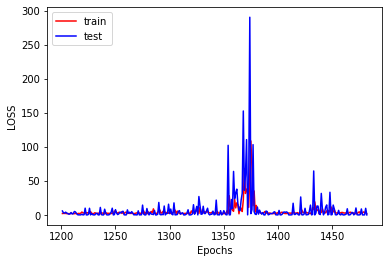

In [150]:
# Graficas de loss
plt.plot(epochs[1200:1600], loss[1200:1600], 'r')
plt.plot(epochs[1200:1600], val_loss[1200:1600], 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

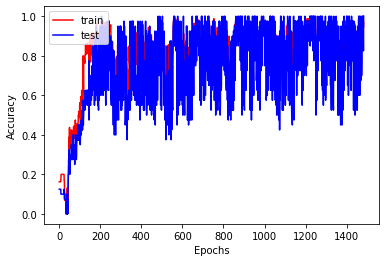

In [151]:
# Graficas de accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [152]:
# evaluamos el modelo
scores = model.evaluate(x_train, y)
 
    
y_t = []
ls = []
for i in y_test:
    ls = [0 for i in range(6)]
    ls[i] = 1
    y_t.append(ls)
y_t = pd.DataFrame(y_t)
y_predicted = model.predict(x_test).round()
print (y_predicted)
print (y_t)

5/5 [==============================] - 0s 3ms/step - loss: 2.5309 - accuracy: 0.9812
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
    0  1  2  3  4  5
0   0  1  0  0  0  0
1   0  0  0  0  0  1
2   1  0  0

In [157]:
stadistics(convert_at_type_array(y_predicted),convert_at_type_array(y_t.to_numpy()))

print(convert_at_type_array(y_predicted))
print(convert_at_type_array(y_t.to_numpy())) 


Cantidad total de pruebas: 40
Cantidad total de aciertos: 40
Porcentaje de aciertos: 100.0%
[1, 5, 0, 5, 2, 5, 1, 4, 3, 1, 1, 1, 1, 2, 1, 0, 4, 5, 5, 3, 5, 4, 4, 5, 0, 4, 3, 1, 0, 2, 1, 1, 1, 1, 1, 2, 3, 1, 0, 3]
[1, 5, 0, 5, 2, 5, 1, 4, 3, 1, 1, 1, 1, 2, 1, 0, 4, 5, 5, 3, 5, 4, 4, 5, 0, 4, 3, 1, 0, 2, 1, 1, 1, 1, 1, 2, 3, 1, 0, 3]


In [172]:
name = "preubas"

In [159]:
# serializar el modelo a JSON
model_json = model.to_json()
with open("./jsons/"+name+".json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
model.save_weights("./h_fives/"+name+".h5")
print("Modelo Guardado!")

Modelo Guardado!


In [160]:
#ver
#https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [ ]:
nameFiles = "preubas"

In [173]:
from keras.models import model_from_json
json_file = open("./jsons/"+nameFiles+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("./h_fives/"+nameFiles+".h5")
print("Cargado modelo desde disco.")
 
# Compilar modelo cargado y listo para usar.
loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

y_predicted_exp = loaded_model.predict(x_test).round()

Cargado modelo desde disco.


In [174]:
stadistics(convert_at_type_array(y_predicted_exp),convert_at_type_array(y_t.to_numpy()))

print(convert_at_type_array(y_predicted_exp))
print(convert_at_type_array(y_t.to_numpy())) 

Cantidad total de pruebas: 40
Cantidad total de aciertos: 40
Porcentaje de aciertos: 100.0%
[1, 5, 0, 5, 2, 5, 1, 4, 3, 1, 1, 1, 1, 2, 1, 0, 4, 5, 5, 3, 5, 4, 4, 5, 0, 4, 3, 1, 0, 2, 1, 1, 1, 1, 1, 2, 3, 1, 0, 3]
[1, 5, 0, 5, 2, 5, 1, 4, 3, 1, 1, 1, 1, 2, 1, 0, 4, 5, 5, 3, 5, 4, 4, 5, 0, 4, 3, 1, 0, 2, 1, 1, 1, 1, 1, 2, 3, 1, 0, 3]


In [175]:
stars_comp = pd.read_csv("test_ds.csv")

In [176]:
colors = ['whitish','red','pale yellow orange','white-yellow','blue','yellow-white','yellowish','yellowish white','orange-red','orange','white','blue white','blue-white']
spectral_classes = ['O', 'F', 'G', 'K', 'A', 'M', 'B']
stars_comp = get_inputs(stars_comp,colors,spectral_classes)
stars_comp

,Temperature,L,R,A_M,whitish,red,pale yellow orange,white-yellow,blue,yellow-white,...,white,blue white,blue-white,O,F,G,K,A,M,B
0,21020,0.00150,0.01120,11.520,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2935,0.00087,0.09320,16.880,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16390,1278.00000,5.68000,-3.320,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3628,0.00550,0.39300,10.480,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3496,0.00125,0.33600,14.940,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3342,0.00150,0.30700,11.870,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,17140,883.00000,5.65300,-2.640,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,24490,248490.00000,1134.50000,-8.240,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,11000,170000.00000,1779.00000,-9.900,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,24020,0.00159,0.01270,10.550,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [177]:
y_predicted_comp = loaded_model.predict(stars_comp).round()
y_predicted_comp = convert_at_type_array(y_predicted_comp)

print(y_predicted_comp)

[2, 0, 3, 1, 1, 1, 3, 5, 5, 2, 4, 2, 3, 0, 0, 4, 2, 5, 1, 4, 0, 5, 4, 4, 0, 1, 0, 5, 3, 4, 3, 3, 0, 5, 0, 1, 4, 0, 0]


In [178]:
indexs = range(1,len(y_predicted_comp)+1)

In [179]:
solution = pd.DataFrame()
solution["Id"] = indexs
solution["Type"] = y_predicted_comp
solution.set_index("Id")

,Type
Id,
1,2
2,0
3,3
4,1
5,1
6,1
7,3
8,5
9,5


In [170]:
#submission.csv
solution.set_index("Id").to_csv("submission.csv",encoding="utf-8")